In [1]:
# wget digunakan untuk mengunduh file yang berasala dari server web
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2023-02-15 11:38:15--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  58.3MB/s    in 1.7s    

2023-02-15 11:38:20 (58.3 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
# Mengunzip fruits.zip.
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [3]:
# Import Library
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Ukuran gambar berupa tinggi dan lebar diubah menjadi 32 x 32
img_height, img_width = 32, 32
# batch size digunakan untuk menentukan berapa banyak gambar yang akan dilatih sebelum memperbaharui parameternya 
batch_size = 20

#Mengambil data train dari data directory
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
#Mengambil data validation dari data directory
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
#Mengambil data test dari data directory
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


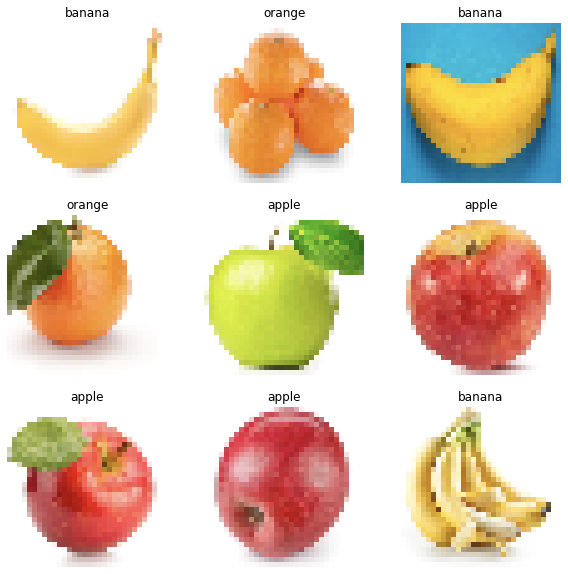

In [5]:
# Membagi kelad menjadi aple, pisang dan orange
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1) 
    # Menampilkan gambar dan memberikan label class pada masing-masing buah
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
model = tf.keras.Sequential(
    [
        #Data preprocessing dari nilai piksel gambar sebelumnya untuk rg dan b dari 0
        # menjadi 255 piksel dan sklanya menjadi 0 hingga 1.
     tf.keras.layers.Rescaling(1./255),
      # Lapisan pertama pada CNN yaitu lapisan convolutional yaitu menerapkan filter ke gambar 
     # untuk mempelajari fitur tertentu dan menerapkan menjadi 32 filter dengan ukuran kernel 3 x 3
     # dan menggunakan activasi ReLu
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
      # Tahapan kedua yaitu maxpooling dengan lapisan 2d. pada tahapan ini akan mengambil sampel ukuran map feature
      # max pooling akan mengambil nilai yang paling besar dari masing-masing sub bidang pada nilai kernel
     # Tujuannya adalah mengurangi map feature 4 kali setiap dimensi dipotong setengahnya
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),

       #Tahapan selanjutnya adalah flatening layer 
     tf.keras.layers.Flatten(),
     # Terdapat 128 neuron
     tf.keras.layers.Dense(128, activation="relu"),
      # model dibagi menjadi 3 kelas
     tf.keras.layers.Dense(3)
    ]
)

In [7]:
# Model dicompile menggunakan optimizer adam dan menggunakan metriks accuracy untuk menghitung keakuratan
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [9]:
#Model dilatih menggunakan fungsi fit dan melatih data dan memvalidasi data yang sudah ditrain dengan menggunakan 
#epochs= 10. yang berarti data akan dilatih sebanyak 10 kali
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
23/23 [==============================] - 4s 86ms/step - loss: 1.0067 - accuracy: 0.5587 - val_loss: 0.8549 - val_accuracy: 0.5000
Epoch 2/10
23/23 [==============================] - 4s 126ms/step - loss: 0.6229 - accuracy: 0.7848 - val_loss: 0.6175 - val_accuracy: 0.7576
Epoch 3/10
23/23 [==============================] - 2s 81ms/step - loss: 0.3371 - accuracy: 0.8913 - val_loss: 0.3044 - val_accuracy: 0.8636
Epoch 4/10
23/23 [==============================] - 2s 74ms/step - loss: 0.2145 - accuracy: 0.9217 - val_loss: 0.1730 - val_accuracy: 0.9091
Epoch 5/10
23/23 [==============================] - 2s 78ms/step - loss: 0.1911 - accuracy: 0.9304 - val_loss: 0.1255 - val_accuracy: 0.9545
Epoch 6/10
23/23 [==============================] - 4s 130ms/step - loss: 0.1601 - accuracy: 0.9435 - val_loss: 0.1318 - val_accuracy: 0.9545
Epoch 7/10
23/23 [==============================] - 2s 80ms/step - loss: 0.1579 - accuracy: 0.9435 - val_loss: 0.2011 - val_accuracy: 0.9545
Epoch 8/10


In [ ]:
# Evaluasi model melalui dataset test
model.evaluate(test_ds)

7/7 [==============================] - 0s 9ms/step - loss: 0.1854 - accuracy: 0.9385


[0.18537680804729462, 0.9384615421295166]

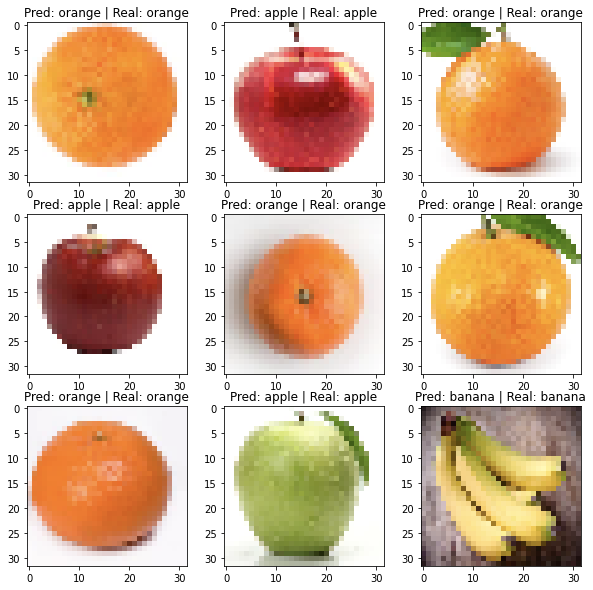

In [ ]:
# Library python yang digunakan untuk bekerja dengan array 
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])
  
 

In [ ]:
# Convert model yang sudah dibangun menjadi tensor flow.lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix